<a href="https://colab.research.google.com/github/anneaiad/Challenge_Telecom_X_Alura/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [47]:
import pandas as pd

In [48]:
#Extrair os dados do API
dados = pd.read_json('/content/TelecomX_Data.json')
dados


customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

# üîß Transforma√ß√£o de Dados

In [49]:
#Verificar nomes das colunas, valores nulos e tipo de dados a serem tratados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [50]:
#Definir a lista de colunas aninhadas a serem tratadas
colunas = ['customer', 'phone', 'internet', 'account']

In [51]:
#Normalizar as colunas aninhadas
df_expandido = dados.copy()

for col in colunas:
    normalizado = pd.json_normalize(df_expandido[col])
    normalizado.columns = [f"{col}_{sub}" for sub in normalizado.columns]
    df_expandido = pd.concat([df_expandido.drop(columns=[col]), normalizado], axis=1)

In [52]:
df_expandido.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [53]:
df = df_expandido
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [54]:
#Salvar uma c√≥pia do df para CSV
df.to_csv('df_normalizado.csv', index=False)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [56]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: customer_gender
['Female' 'Male']

Coluna: customer_SeniorCitizen
[0 1]

Coluna: customer_Partner
['Yes' 'No']

Coluna: customer_Dependents
['Yes' 'No']

Coluna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone_PhoneService
['Yes' 'No']

Coluna: phone_MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet_InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet_OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet_OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet_DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet_TechSupport
['Yes' 'No' 'No internet service']

Coluna: internet_Stre

In [57]:
import numpy as np

In [58]:
#Tratar string vazia como NaN
df['Churn'] = df['Churn'].replace('', np.nan)


In [59]:
#Remover as linhas NaN para transformar a coluna em tipo bool
df = df.dropna(subset=['Churn'])
df.reset_index(inplace=True, drop=True)


In [60]:
#Listar todas as colunas de "sim" ou "n√£o" para transformar em tipo bool
colunas_sim_nao = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
colunas_sim_nao

['Churn',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'account_PaperlessBilling']

In [61]:
#Usar o map e o dicion√°rio para transformar as palavras "Yes" e "No" em "True" ou "False"
for col in colunas_sim_nao:
    df[col] = df[col].map({'Yes': True, 'No': False})

/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [62]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [63]:
#Transformar os dados 0 e 1 em Falso ou True
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})

/tmp/ipython-input-3777225341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})


In [64]:
#Transformar a coluna customer_SeniorCitizen para o tipo bool
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


/tmp/ipython-input-4007585460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


In [65]:
df.head()

customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO  False          Female                   False   
1  0003-MKNFE  False            Male                   False   
2  0004-TLHLJ   True            Male                   False   
3  0011-IGKFF   True            Male                    True   
4  0013-EXCHZ   True          Female                    True   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0              True                 True                9                True   
1             False                False                9                True   
2             False                False                4                True   
3              True                False               13                True   
4              True                False                3                True   

  phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                  No                      DSL  ...                   Yes   
1                 Yes                      DSL  ...                    No   
2                  No              Fiber optic  ...                    No   
3                  No              Fiber optic  ...                   Yes   
4                  No              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                     True   
1                      Yes   Month-to-month                    False   
2                       No   Month-to-month                     True   
3                      Yes   Month-to-month                     True   
4                       No   Month-to-month                     True   

   account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0           Mailed check                    65.6                  593.3  
1           Mailed check                    59.9                  542.4  
2       Electronic check                    73.9                 280.85  
3       Electronic check                    98.0                1237.85  
4           Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [66]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [67]:
#Verificar se tem "," na coluna account_Charges.Total pois se trata de um dataFrame de l√≠ngua inglesa
df['account_Charges.Total'].str.contains(',').sum()

np.int64(0)

In [68]:
#Transformar a coluna em num√©rica
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


/tmp/ipython-input-1149699027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [69]:
#Transformar para float
df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)

/tmp/ipython-input-2436792186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)


In [70]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
dtype: object


In [71]:
df.head()

customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO  False          Female                   False   
1  0003-MKNFE  False            Male                   False   
2  0004-TLHLJ   True            Male                   False   
3  0011-IGKFF   True            Male                    True   
4  0013-EXCHZ   True          Female                    True   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0              True                 True                9                True   
1             False                False                9                True   
2             False                False                4                True   
3              True                False               13                True   
4              True                False                3                True   

  phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                  No                      DSL  ...                   Yes   
1                 Yes                      DSL  ...                    No   
2                  No              Fiber optic  ...                    No   
3                  No              Fiber optic  ...                   Yes   
4                  No              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                     True   
1                      Yes   Month-to-month                    False   
2                       No   Month-to-month                     True   
3                      Yes   Month-to-month                     True   
4                       No   Month-to-month                     True   

   account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0           Mailed check                    65.6                 593.30  
1           Mailed check                    59.9                 542.40  
2       Electronic check                    73.9                 280.85  
3       Electronic check                    98.0                1237.85  
4           Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

#üìä Carga e an√°lise

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Verificar quantos clientes sa√≠ram e quantos ficaram
print(df['Churn'].value_counts())


Churn
False    5174
True     1869
Name: count, dtype: int64


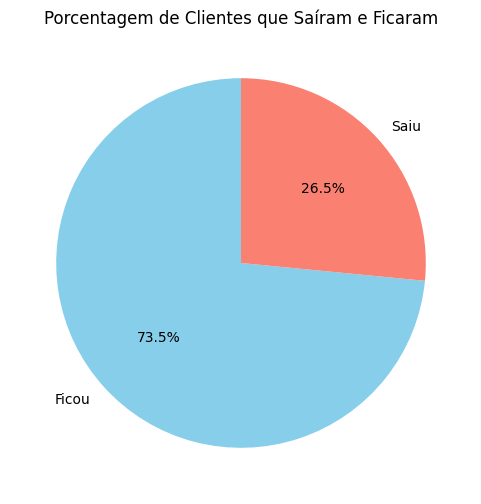

In [135]:
import matplotlib.pyplot as plt

# Contar quantos clientes sa√≠ram e ficaram
contagem = df['Churn'].value_counts()

# Definir labels e cores
labels = ['Ficou', 'Saiu']
cores = ['skyblue', 'salmon']

# Criar o gr√°fico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Clientes que Sa√≠ram e Ficaram')

plt.savefig("grafico_pizza_total_clientes_churn.png")
plt.show()


In [89]:
#Criar uma nova coluna com os valores gastos di√°rios
df['account_Charges.Daily'] = df['account_Charges.Monthly'] / 30
df.head()

/tmp/ipython-input-3294353655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Daily'] = df['account_Charges.Monthly'] / 30


customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO  False          Female                   False   
1  0003-MKNFE  False            Male                   False   
2  0004-TLHLJ   True            Male                   False   
3  0011-IGKFF   True            Male                    True   
4  0013-EXCHZ   True          Female                    True   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0              True                 True                9                True   
1             False                False                9                True   
2             False                False                4                True   
3              True                False               13                True   
4              True                False                3                True   

  phone_MultipleLines internet_InternetService  ... internet_DeviceProtection  \
0                  No                      DSL  ...                        No   
1                 Yes                      DSL  ...                        No   
2                  No              Fiber optic  ...                       Yes   
3                  No              Fiber optic  ...                       Yes   
4                  No              Fiber optic  ...                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_Contract account_PaperlessBilling account_PaymentMethod  \
0         One year                     True          Mailed check   
1   Month-to-month                    False          Mailed check   
2   Month-to-month                     True      Electronic check   
3   Month-to-month                     True      Electronic check   
4   Month-to-month                     True          Mailed check   

   account_Charges.Monthly account_Charges.Total  account_Charges.Daily  
0                     65.6                593.30               2.186667  
1                     59.9                542.40               1.996667  
2                     73.9                280.85               2.463333  
3                     98.0               1237.85               3.266667  
4                     83.9                267.40               2.796667  

[5 rows x 22 columns]

In [98]:
desc_numerico = df.describe().T


In [101]:
desc_numerico['std'] = df.std(numeric_only=True)

In [102]:
desc_numerico['median'] = df.median(numeric_only=True)

In [100]:
desc_numerico = desc_numerico[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Estat√≠sticas Descritivas - Num√©ricas")
print(desc_numerico)

Estat√≠sticas Descritivas - Num√©ricas
                                mean    median          std        min  \
customer_tenure            32.371149    29.000    24.559481   0.000000   
account_Charges.Monthly    64.761692    70.350    30.090047  18.250000   
account_Charges.Total    2283.300441  1397.475  2266.771362  18.800000   
account_Charges.Daily       2.158723     2.345     1.003002   0.608333   

                                25%       50%        75%          max  
customer_tenure            9.000000    29.000    55.0000    72.000000  
account_Charges.Monthly   35.500000    70.350    89.8500   118.750000  
account_Charges.Total    401.450000  1397.475  3794.7375  8684.800000  
account_Charges.Daily      1.183333     2.345     2.9950     3.958333  


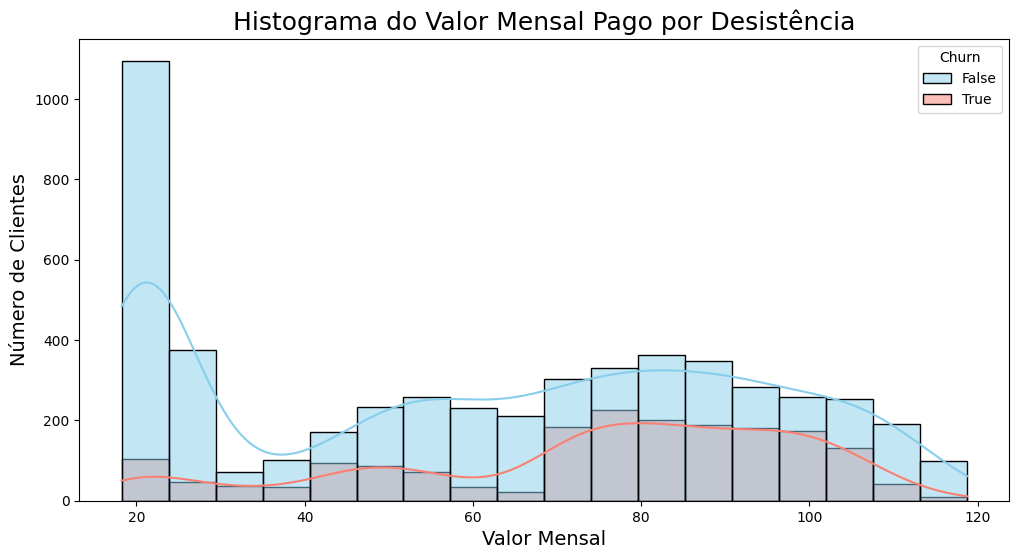

In [139]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, x='account_Charges.Monthly', hue='Churn', kde=True,
             palette={False:'skyblue', True:'salmon'}, alpha=0.5)
plt.title('Histograma do Valor Mensal Pago por Desist√™ncia', fontsize=18)
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.xlabel('Valor Mensal', fontsize=14)
plt.savefig("Histograma_Valor_Mensal_churn.png")
plt.show()


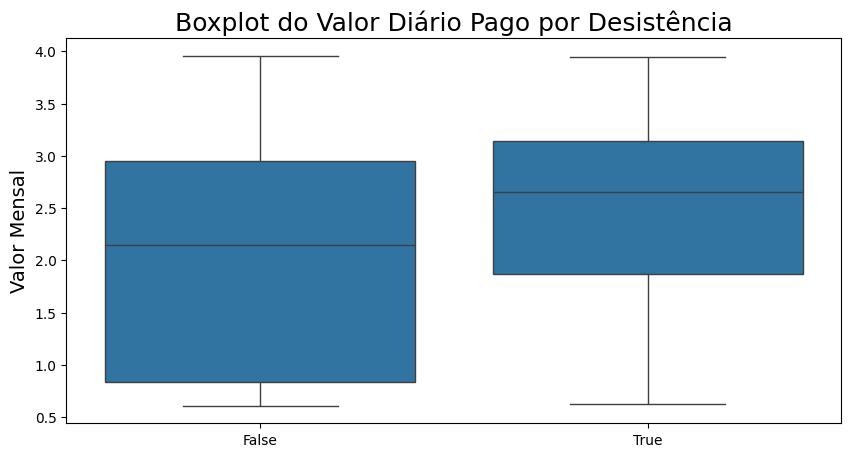

In [138]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Churn', y='account_Charges.Daily', data=df)
plt.title('Boxplot do Valor Di√°rio Pago por Desist√™ncia', fontsize=18)
plt.ylabel('Valor Mensal', fontsize=14)
plt.xlabel('')
plt.savefig("Boxplot_Valor_Di√°rio_churn.png")
plt.show()


In [75]:
print(df.groupby('account_PaymentMethod')['Churn'].value_counts())


account_PaymentMethod      Churn
Bank transfer (automatic)  False    1286
                           True      258
Credit card (automatic)    False    1290
                           True      232
Electronic check           False    1294
                           True     1071
Mailed check               False    1304
                           True      308
Name: count, dtype: int64


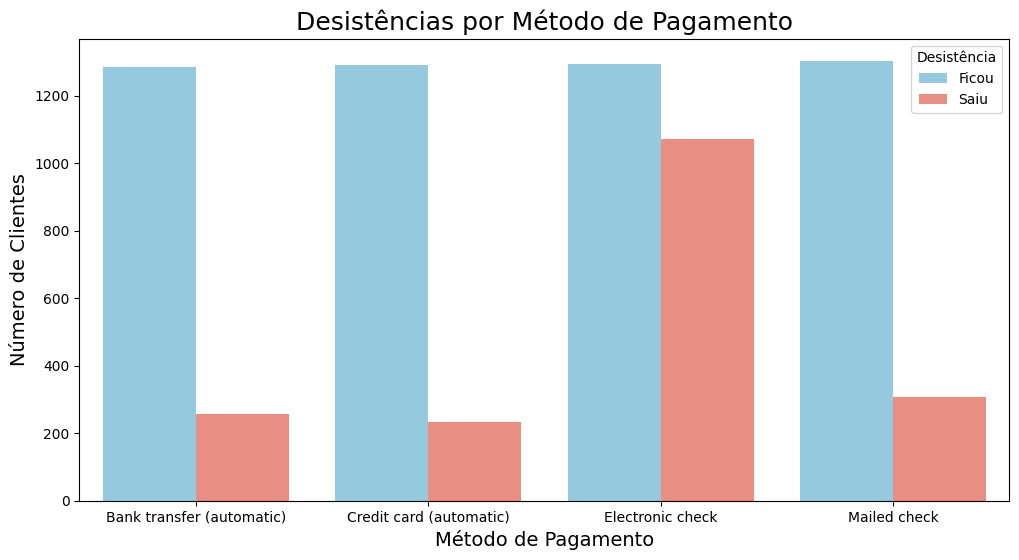

In [140]:
#Criar um gr√°fico de barras agrupadas para melhor vizualiza√ß√£o dos dados
plt.figure(figsize=(12,6))
ax = sns.barplot(x='account_PaymentMethod', y='counts', hue='Churn', data=churn_metodo_pagamento, palette=palette)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desist√™ncia')

plt.title('Desist√™ncias por M√©todo de Pagamento', fontsize=18)
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.xlabel('M√©todo de Pagamento', fontsize=14)
plt.savefig("grafico_Desist√™ncias_M√©todo_Pagamento_churn.png")
plt.show()


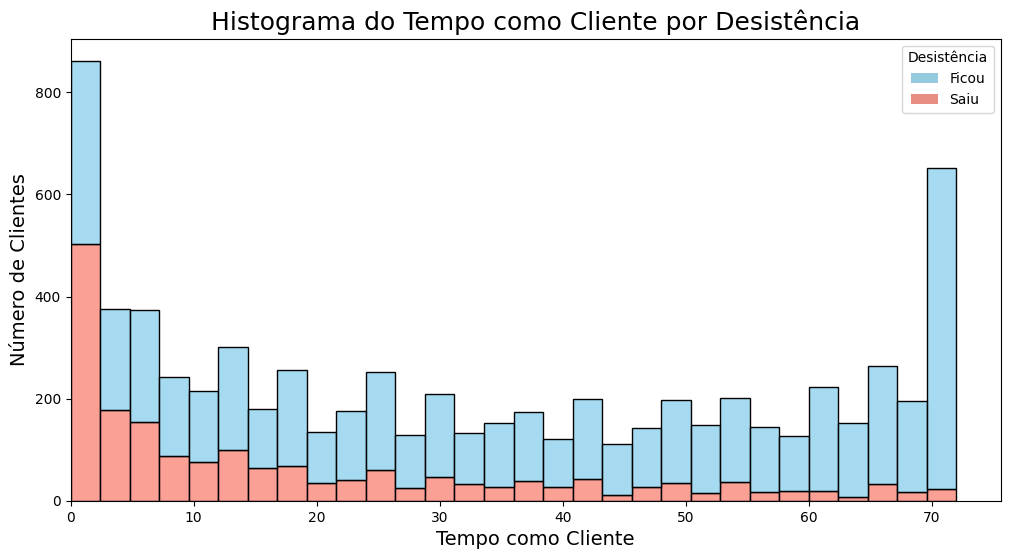

In [141]:
palette = {False: "skyblue", True: "salmon"}
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack', bins=30, palette=palette)
plt.title('Histograma do Tempo como Cliente por Desist√™ncia', fontsize=18)
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.xlabel('Tempo como Cliente', fontsize=14)
plt.xlim(left=0)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desist√™ncia')
plt.savefig("Histograma_Tempo_Cliente_churn.png")
plt.show()


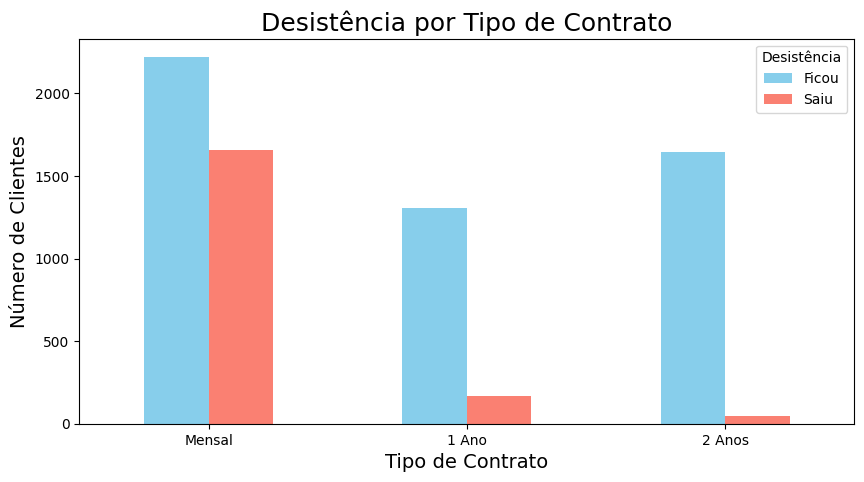

In [142]:
churn_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack()

churn_contrato.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10,5))
plt.title('Desist√™ncia por Tipo de Contrato', fontsize=18)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.legend(title='Desist√™ncia', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1, 2], labels=['Mensal', '1 Ano', '2 Anos'])
plt.xticks(rotation=0)
plt.savefig("grafico_Desist√™ncia_Tipo_Contrato.png")
plt.show()




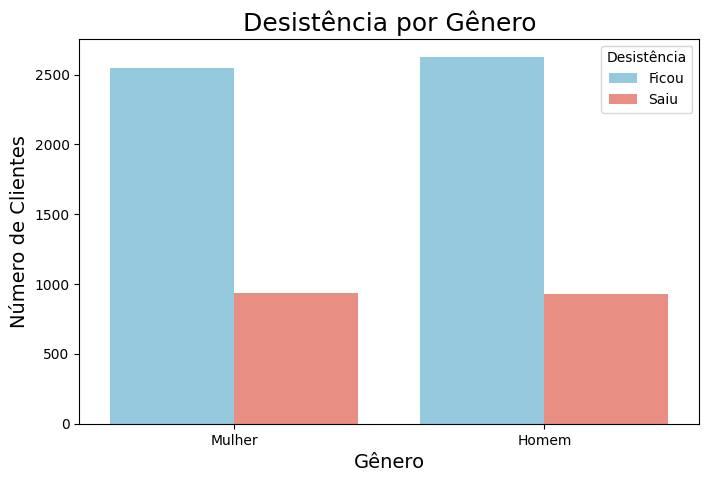

In [143]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_gender', hue='Churn', data=df, palette=palette)
plt.title('Desist√™ncia por G√™nero', fontsize=18)
plt.xlabel('G√™nero', fontsize=14)
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.legend(title='Desist√™ncia', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem'])
plt.savefig("grafico_Desist√™ncia_G√™nero.png")
plt.show()

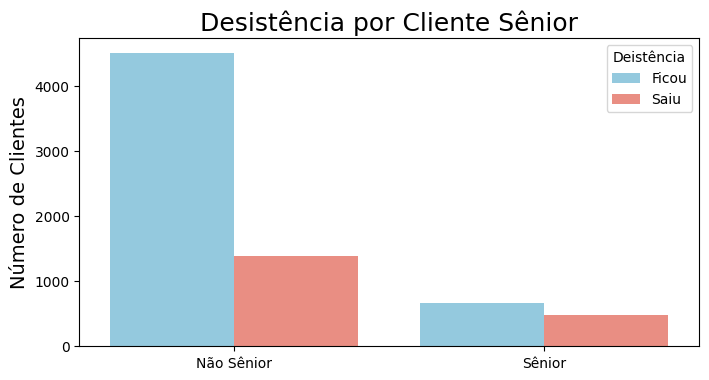

In [144]:
plt.figure(figsize=(8,4))
sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df, palette=palette)
plt.title('Desist√™ncia por Cliente S√™nior', fontsize=18)
plt.xlabel('')
plt.ylabel('N√∫mero de Clientes', fontsize=14)
plt.legend(title='Deist√™ncia', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['N√£o S√™nior', 'S√™nior'])
plt.savefig("grafico_Desist√™ncia_Senior.png")
plt.show()

In [82]:
col_servicos_sim_nao = ['phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

In [83]:
df_servicos = df[col_servicos_sim_nao].copy()


In [84]:
for col in col_servicos_sim_nao:
    df_servicos[col] = df_servicos[col].replace({
        'Yes': True,
        'No': False,
        'No internet service': False,
        'No phone service': False,
        'Fiber optic': True,
        'DSL': True
    }).infer_objects()

/tmp/ipython-input-384879429.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_servicos[col] = df_servicos[col].replace({


In [85]:
df_servicos['qtd_servicos'] = df_servicos.sum(axis=1)



In [86]:
df_servicos['Churn'] = df['Churn']



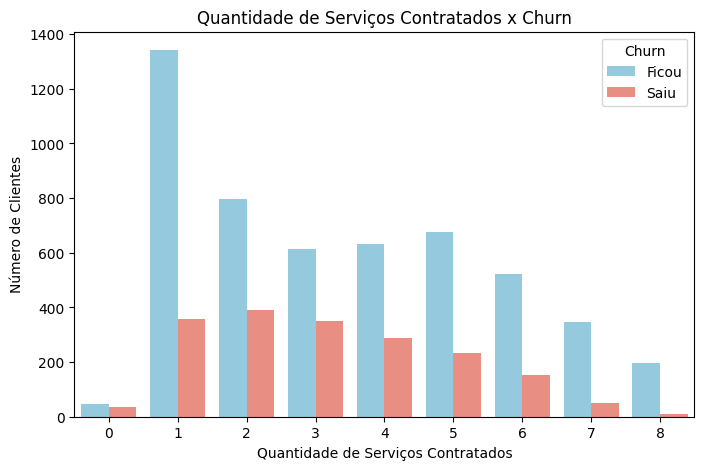

In [145]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='qtd_servicos', hue='Churn', data=df_servicos, palette={False:'skyblue', True:'salmon'})
plt.title('Quantidade de Servi√ßos Contratados x Churn')
plt.xlabel('Quantidade de Servi√ßos Contratados')
plt.ylabel('N√∫mero de Clientes')
plt.legend(title='Churn', labels=['Ficou', 'Saiu'])
plt.savefig("grafico_Quantidade_Servi√ßos_Contratados_churn.png")
plt.show()

#üìÑRelatorio Final

Relat√≥rio de An√°lise de Desistencia/Churn de Clientes
**bold text**
1. Introdu√ß√£o

Objetivo:
O objetivo desta an√°lise √© identificar padr√µes e fatores que influenciam a evas√£o de clientes na empresa Telecom X, utilizando uma base de dados de uma API, aplicando os conhecimentos em ETL aprendidos.

Objetivo did√°tico:
- Importar e manipular dados de uma API de forma eficiente.
- Aplicar os conceitos de ETL (Extra√ß√£o, Transforma√ß√£o e Carga) na prepara√ß√£o dos dados.
- Criar visualiza√ß√µes de dados estrat√©gicas para identificar padr√µes e tend√™ncias.
- Realizar uma An√°lise Explorat√≥ria de Dados (EDA) e gerar um relat√≥rio com insights relevantes.

2. Extra√ß√£o de dados:

Arquivo importado de uma API no formato JSON.
Bibliotecas utilizadas: pandas, numpy, matplotlib, seaborn.

3. Tratamentos realizados:

Padroniza√ß√£o de colunas. Normaliza√ß√£o de dados aninhados.

Convers√£o de valores categ√≥ricos para facilitar an√°lise.

Cria√ß√£o de nova tabela com valores di√°rio pago para ajudar na estat√≠stica descritiva num√©rica.

Remo√ß√£o de valores ausentes ou inconsistentes.

4. An√°lise Explorat√≥ria de Dados
Principais an√°lises realizadas:

Distribui√ß√£o geral do churn:
Quantidade de Clientes/Churn
Ficaram:    5174
Sa√≠ram:     1869

Gr√°fico de pizza mostrando propor√ß√£o de clientes que ficaram e sa√≠ram.
De acordo com o gr√°fico podemos observar que o n√∫mero de clientes que sa√≠ram corresponde a 27% do total de clientes.

Histograma Desistencia/Churn por valor mensal pago: podemos observar que a maior concentra√ß√£o de desist√™ncia est√° nos valores pagos mensais entre 70 e 100

Boxplot do Valor Di√°rio Pago por Desist√™ncia: podemos observar que os √≠ndices de desist√™ncia/churn est√£o localizados no maior valor di√°rio.

Gr√°fico de barras agrupadas Desist√™ncia/Churn por m√©todo de pagamento: no gr√°fico podemos observar que a maior quantidade de desist√™ncia est√° concentrado no m√©todo de pagamento 'Eletronic check' (cheque eletr√¥nico ou eCheck).

Histograma de Desistencia/Churn por tempo de cliente (tenure): no histograma podemos observar que os maiores √≠ndices de churn est√£o nos clientes mais novos com menos de 10 meses de contrato.

Gr√°fico de barras agrupadas Desist√™ncia/Churn por tipo de contrato: confirmando a an√°lise do Histograma de Desistencia/Churn por tempo de cliente (tenure), o n√∫mero de desist√™ncia para contratos do tipo Mensal √© expressivamente superior ao contrato de 1 Ano ou 2 Anos.

Gr√°fico de barras agrupadas de Desistencia/Churn por g√™nero: a diferen√ßa de desist√™ncia entre homem e mulher √© inexpressiva.

Gr√°fico de barras agrupadas de Desistencia/Churn por Cliente S√™nior: a quantidade de desist√™ncia se concentra nos clientes n√£o s√™nior.

Gr√°fico de barras agrupadas de Desistencia/Churn por quantidade de servi√ßos contratados: podemos verificar que quanto mais servi√ßos contratados menor o √≠ndice de desist√™ncia/churn.

5. Resumo e conclus√£o

A an√°lise revelou que aproximadamente 27% dos clientes sa√≠ram, indicando um √≠ndice significativo de evas√£o.

Observou-se que a maior concentra√ß√£o de desist√™ncias est√° entre clientes que pagam mensalidades na faixa de 70 a 100, e que aqueles com maior valor di√°rio pago apresentam tamb√©m √≠ndices mais elevados de churn, sugerindo que clientes com gastos mais altos podem estar mais propensos a cancelar.

O m√©todo de pagamento "Electronic check" ou eCheck foi identificado como o mais associado a desist√™ncias, o que indica uma poss√≠vel vulnerabilidade ou insatisfa√ß√£o relacionada a essa forma de pagamento.

Clientes com menos de 10 meses de contrato apresentam maior risco de churn, refor√ßando a import√¢ncia da reten√ß√£o nos primeiros meses de relacionamento. Contratos mensais t√™m taxas de churn significativamente superiores aos contratos anuais ou bienais, evidenciando que planos de maior prazo favorecem a fideliza√ß√£o.

N√£o foram encontradas diferen√ßas relevantes entre g√™neros, mas entre clientes s√™nior e n√£o s√™nior o churn √© maior em clientes mais jovens, o que pode indicar a maior facilidade de cancelamento ou mudan√ßa de servi√ßo, uma vez que pessoas mais jovens tem maior acesso a novidades no mercado, principalmente atrav√©s da internet.

Por fim, foi constatado que a quantidade de servi√ßos contratados est√° inversamente relacionada √† evas√£o, ou seja, quanto mais servi√ßos o cliente possui, menor a chance dele cancelar.

6. Recomenda√ß√µes:

Focar em estrat√©gias de reten√ß√£o para clientes novos: implementar programas de boas-vindas, benef√≠cios ou descontos nos primeiros 10 meses para aumentar a fideliza√ß√£o.

Revisar e otimizar o processo relacionado ao m√©todo de pagamento "Electronic check": identificar poss√≠veis falhas, atrasos ou dificuldades que possam gerar insatisfa√ß√£o e aumentar o risco de churn.

Incentivar planos de contratos de maior prazo: oferecer vantagens para migra√ß√£o de contratos mensais para anuais ou bienais, promovendo maior estabilidade na base de clientes.

Criar pacotes e promo√ß√µes para ampliar o n√∫mero de servi√ßos contratados por cliente: j√° que mais servi√ßos est√£o associados a menor churn, estimular o cross-selling pode aumentar o engajamento e reduzir a evas√£o.

Monitorar clientes de maior gasto di√°rio: identificar poss√≠veis causas de insatisfa√ß√£o e criar canais de atendimento priorit√°rio para esses clientes, buscando reduzir cancelamentos.

